<a href="https://colab.research.google.com/github/hay-k/CohortProject_2020_w4g4/blob/master/Project_4_Ising_Annealer/Car_Rental_Trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Note you need to do the pip install and git clone only once!
#That is, at the begining of your runtime on the Google Colab.

#Car Rental Schedule
based on the annealing for the Travelling Salesman Problem
https://github.com/perrygeo/simanneal

## Preamble - set up the repo and dependences

In [9]:
 #!git clone https://github.com/perrygeo/simanneal.git

Cloning into 'simanneal'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 312 (delta 15), reused 23 (delta 8), pack-reused 275
Receiving objects: 100% (312/312), 819.28 KiB | 15.46 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [10]:
#!cd ./simanneal/ && pip install -e .

Obtaining file:///content/simanneal
  Running setup.py develop for simanneal


In [1]:
#pip install -e git+https://github.com/perrygeo/simanneal.git  # latest from github
#!pip install simanneal  # from pypi

!pip show simanneal  # from pypi

#you may have to restart you runtime after instalatins are compleat!

Name: simanneal
Version: 0.5.0
Summary: Simulated Annealing in Python
Home-page: https://github.com/perrygeo/simanneal
Author: Matthew Perry
Author-email: perrygeo@gmail.com
License: BSD
Location: /content/simanneal
Requires: 
Required-by: 


In [2]:
import sys
f_loc="./simanneal/tests/"
if f_loc not in sys.path: sys.path.append(f_loc)

In [3]:
import random
import sys
import time

from helper import distance, cities, distance_matrix
from simanneal import Annealer

if sys.version_info.major >= 3:  # pragma: no cover
    from io import StringIO
else:
    from StringIO import StringIO

##Define the Annealer functoins and test them

In [4]:
%%time
#see ./simanneal/examples/salesman.py
# -*- coding: utf-8 -*-
from __future__ import print_function
import math
import random
from simanneal import Annealer


def distance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 3963  # radius of Earth (miles)
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R


class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e


if __name__ == '__main__':

    # latitude and longitude for the twenty largest U.S. cities
    cities = {
        'New York City': (40.72, 74.00),
        'Los Angeles': (34.05, 118.25),
        'Chicago': (41.88, 87.63),
        'Houston': (29.77, 95.38),
        'Phoenix': (33.45, 112.07),
        'Philadelphia': (39.95, 75.17),
        'San Antonio': (29.53, 98.47),
        'Dallas': (32.78, 96.80),
        'San Diego': (32.78, 117.15),
        'San Jose': (37.30, 121.87),
        'Detroit': (42.33, 83.05),
        'San Francisco': (37.78, 122.42),
        'Jacksonville': (30.32, 81.70),
        'Indianapolis': (39.78, 86.15),
        'Austin': (30.27, 97.77),
        'Columbus': (39.98, 82.98),
        'Fort Worth': (32.75, 97.33),
        'Charlotte': (35.23, 80.85),
        'Memphis': (35.12, 89.97),
        'Baltimore': (39.28, 76.62)
    }

    # initial state, a randomly-ordered itinerary
    init_state = list(cities.keys())
    random.shuffle(init_state)

    # create a distance matrix
    distance_matrix = {}
    for ka, va in cities.items():
        distance_matrix[ka] = {}
        for kb, vb in cities.items():
            if kb == ka:
                distance_matrix[ka][kb] = 0.0
            else:
                distance_matrix[ka][kb] = distance(va, vb)

    tsp = TravellingSalesmanProblem(init_state, distance_matrix)
    tsp.set_schedule(tsp.auto(minutes=0.2))
    # since our state is just a list, slice is the fastest way to copy
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()

    while state[0] != 'New York City':
        state = state[1:] + state[:1]  # rotate NYC to start

    print()
    print("%i mile route:" % e)
    print(" ➞  ".join(state))



 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     3.30000       7178.67     4.50%     0.00%     0:00:02     0:00:00
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     3.30000       6883.00     4.75%     0.07%     0:00:06     0:00:00


6845 mile route:
New York City ➞  Philadelphia ➞  Baltimore ➞  Charlotte ➞  Jacksonville ➞  Houston ➞  Austin ➞  San Antonio ➞  Phoenix ➞  San Diego ➞  Los Angeles ➞  San Jose ➞  San Francisco ➞  Fort Worth ➞  Dallas ➞  Memphis ➞  Indianapolis ➞  Chicago ➞  Detroit ➞  Columbus
CPU times: user 8.04 s, sys: 26.7 ms, total: 8.07 s
Wall time: 8.06 s


In [5]:
cities

{'Austin': (30.27, 97.77),
 'Baltimore': (39.28, 76.62),
 'Charlotte': (35.23, 80.85),
 'Chicago': (41.88, 87.63),
 'Columbus': (39.98, 82.98),
 'Dallas': (32.78, 96.8),
 'Detroit': (42.33, 83.05),
 'Fort Worth': (32.75, 97.33),
 'Houston': (29.77, 95.38),
 'Indianapolis': (39.78, 86.15),
 'Jacksonville': (30.32, 81.7),
 'Los Angeles': (34.05, 118.25),
 'Memphis': (35.12, 89.97),
 'New York City': (40.72, 74.0),
 'Philadelphia': (39.95, 75.17),
 'Phoenix': (33.45, 112.07),
 'San Antonio': (29.53, 98.47),
 'San Diego': (32.78, 117.15),
 'San Francisco': (37.78, 122.42),
 'San Jose': (37.3, 121.87)}

In [146]:
def make_itinerary(current_location,initial_state):

  if current_location not in initial_state:
    initial_state.append(current_location) 
    print("\nAdding your current location to the initial list!")

  # populate your cities list with coordinate information
  my_cities={}
  for city in initial_state:
    if city in cities.keys():
      my_cities[city]=cities[city]
    else:
      print("No location coordinates for ",city)
      if city==current_location:
        print("Add your location coordinates!")
        return
  
  # initial state, a randomly-ordered itinerary
  init_state = initial_state
  random.shuffle(init_state)

  # create a distance matrix
  distance_matrix = {}
  for ka, va in my_cities.items():
      distance_matrix[ka] = {}
      for kb, vb in my_cities.items():
          if kb == ka:
              distance_matrix[ka][kb] = 0.0
          else:
              distance_matrix[ka][kb] = distance(va, vb)

  tsp = TravellingSalesmanProblem(init_state, distance_matrix)
  '''
  tsp.set_schedule(tsp.auto(minutes=0.2))
  # since our state is just a list, slice is the fastest way to copy
  tsp.copy_strategy = "slice"
  '''
  itinerary, miles = tsp.anneal()

  while itinerary[0] != current_location:
      itinerary = itinerary[1:] + itinerary[:1]  # rotate to start correctly

  print()
  print("%i mile route:" % miles)
  print(" ➞  ".join(itinerary))
  return itinerary, miles


##Define a map ploting function

In [8]:
#!pip install geopandas
!pip show geopandas

Name: geopandas
Version: 0.8.1
Summary: Geographic pandas extensions
Home-page: http://geopandas.org
Author: GeoPandas contributors
Author-email: kjordahl@alum.mit.edu
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: pandas, shapely, fiona, pyproj
Required-by: 


In [38]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
#import argparse

In [165]:
#original function plot_map from QAlpha team in the CDL-Quantum/Hackathon2020

def plot_map(itinerary,cities):

  #VGG note that our cities list has positive values for the Longitude
    data_list=[[key, cities[key][0], - cities[key][1]] for key in cities.keys()]
    df = pd.DataFrame(data_list)
    data_list=[[city, cities[city][0], - cities[city][1]] for city in itinerary]
    df_visit = pd.DataFrame(data_list)
    
    #City,Latitude,Longitude
    df.columns=['City','Latitude','Longitude']
    df_visit.columns = ['City','Latitude','Longitude']
    df_start = df_visit[df_visit['City'].isin([itinerary[0]])]  
    df_end = df_visit[df_visit['City'].isin([itinerary[-1]])] 

    gdf_all = geopandas.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
    gdf_visit = geopandas.GeoDataFrame(
        df_visit, geometry=geopandas.points_from_xy(df_visit.Longitude, df_visit.Latitude))
    gdf_start = geopandas.GeoDataFrame(
        df_start, geometry=geopandas.points_from_xy(df_start.Longitude, df_start.Latitude))
    gdf_end = geopandas.GeoDataFrame(
        df_end, geometry=geopandas.points_from_xy(df_end.Longitude, df_end.Latitude))

    world = geopandas.read_file(
        geopandas.datasets.get_path('naturalearth_lowres'))

    # Restrict to the USA only.
    ax = world[world.name == 'United States of America'].plot(
        color='white', edgecolor='black')

    # plot the ``GeoDataFrame``
    x_values=gdf_visit.values.T[2]
    y_values=gdf_visit.values.T[1]
    plt.plot(x_values,y_values)

    gdf_all.plot(ax=ax, color='gray')
    gdf_visit.plot(ax=ax, color='blue')
    gdf_start.plot(ax=ax, color='green')
    gdf_end.plot(ax=ax, color='red')

    ax.set_xlim(xmin=-130, xmax=-65)
    ax.set_ylim(ymin=20, ymax=55)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_aspect(1.2)

    ax.legend(['Path','All cites', 'To Visit','Start','End'])

    plt.show()

##Crate the travel itinerary

In [152]:
cities

{'Austin': (30.27, 97.77),
 'Baltimore': (39.28, 76.62),
 'Charlotte': (35.23, 80.85),
 'Chicago': (41.88, 87.63),
 'Columbus': (39.98, 82.98),
 'Dallas': (32.78, 96.8),
 'Detroit': (42.33, 83.05),
 'Fort Worth': (32.75, 97.33),
 'Houston': (29.77, 95.38),
 'Indianapolis': (39.78, 86.15),
 'Jacksonville': (30.32, 81.7),
 'Los Angeles': (34.05, 118.25),
 'Memphis': (35.12, 89.97),
 'New York City': (40.72, 74.0),
 'Philadelphia': (39.95, 75.17),
 'Phoenix': (33.45, 112.07),
 'San Antonio': (29.53, 98.47),
 'San Diego': (32.78, 117.15),
 'San Francisco': (37.78, 122.42),
 'San Jose': (37.3, 121.87)}


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  3962.23298       6081.46    86.80%    36.40%     0:00:00     0:00:01


Adding your current location to the initial list!


     2.50000       5853.51    13.40%     0.00%     0:00:01     0:00:00


5853 mile route:
San Francisco ➞  Los Angeles ➞  San Diego ➞  Dallas ➞  Houston ➞  Philadelphia ➞  New York City


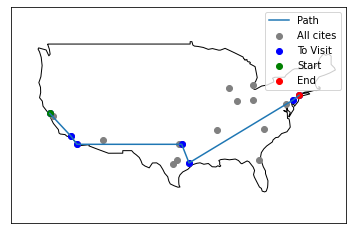

CPU times: user 1.31 s, sys: 126 ms, total: 1.43 s
Wall time: 1.38 s


In [171]:
%%time
initial_state = ['New York City', 'Los Angeles','Dallas', 'Philadelphia', 'Houston','San Diego']
current_location= 'San Francisco'

itinerary, miles = make_itinerary(current_location,initial_state)
plot_map(itinerary,cities)